In [1]:
from MD_PLIP.md_tools.md_tools import load_traj, random_sampling, cluster_traj, analysis
from MD_PLIP.basic import config

# config.NOHYDRO=True

t, topology = load_traj(top="./Example_MD/7THC/md_0_100_centered.gro",traj="./Example_MD/7THC/md_0_100_centered.xtc", stride=10)

# random_sampling(t, 25, "./Example_MD/7THC/clusters")
# cluster_traj(t, 0.3, min_clust=1, max_clust=100, save_files=False)

In [2]:
analyser = analysis(t, topology, "./Example_MD/7THC/clusters")
bsid = analyser.bsids[0]

In [3]:
analyser.analyse_bsid(bsid, save_files=False)

In [4]:
# # analyser.plot_HPI(plot_thresh=0.2,save_files=False)
# analyser.plot_HB(plot_thresh=0.1,save_files=False)
# analyser.plot_PS(plot_thresh=0.2,save_files=False)
# analyser.plot_PC(plot_thresh=0.2,save_files=False)
# analyser.plot_SB(plot_thresh=0.2,save_files=False)

[11:04:04] Molecule does not have explicit Hs. Consider calling AddHs()


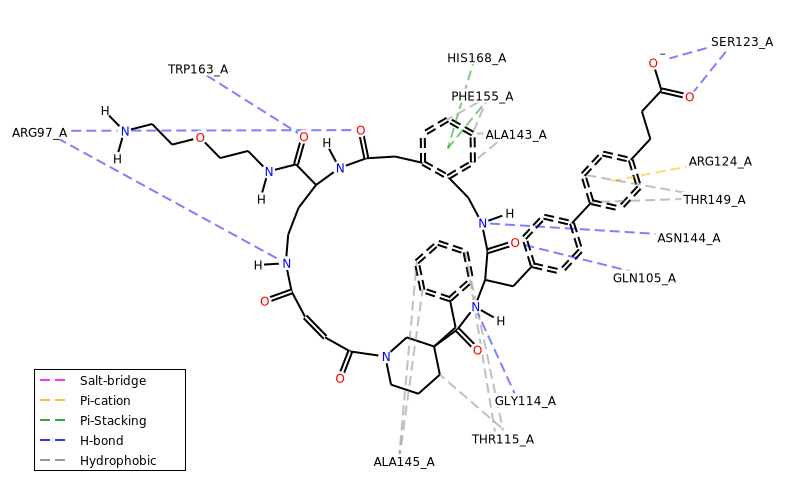

In [5]:
analyser.plot_2D_interactions(plot_thresh=0.4)

In [7]:
analyser.representative_frame(thresh=0.3, save_files=True, pymol=True)

360

In [ ]:
analyser.

In [21]:
ifp_df=analyser.get_ifp_matrix(save_files=False)

In [31]:
traj_ifp = analyser.traj_ifp(save_files=False, thresh = 0.3, fraction=False)

In [57]:
from scipy.spatial.distance import rogerstanimoto
import numpy as np
from MD_PLIP.structure.preparation import PDBComplex
from MD_PLIP.exchange.report import BindingSiteReport
from MD_PLIP.md_tools.md_tools import int_fp_matrix, traj_ifp
from MD_PLIP.md_tools.figures import save_pymol
import pandas as pd
import os

config.PISTACK_OFFSET_MAX = 3.0
config.PISTACK_DIST_MAX = 5.5


keys = (
    "hydrophobic",
    "hbond",
    "waterbridge",
    "saltbridge",
    "pistacking",
    "pication",
    "halogen",
    "metal",
)

hbkeys = [
    "resnr",
    "restype",
    "reschain",
    "resnr_l",
    "restype_l",
    "reschain_l",
    "sidechain",
    "protisdon",
    "d_orig_idx",
    "a_orig_idx",
    "h"
]

def plip_analysis(pdb_file, bsid, outdir, save_files=False, pymol=False):
    my_mol = PDBComplex()
    my_mol.load_pdb(pdb_file)

    my_mol.analyze()
    my_interactions = my_mol.interaction_sets[bsid]

    if pymol & save_files:
        save_pymol(my_mol, bsid, outdir)

    bsr = BindingSiteReport(my_interactions)

    interactions = {
        k: [getattr(bsr, k + "_features")] + getattr(bsr, k + "_info")
        for k in keys
    }

    self.interaction_test = interactions

    try:
        hp_df = pd.DataFrame(interactions["hydrophobic"][1:], columns=interactions["hydrophobic"][0])
        hb_df = []
        for hb in my_interactions.all_hbonds_pdon + my_interactions.all_hbonds_ldon:
            hb_interactions = []
            for k in hbkeys:
                hb_interactions.append(getattr(hb, k))

            hb_df.append(np.array(hb_interactions))

        hb_df = pd.DataFrame(np.stack(hb_df), columns=hbkeys)
        hb_df["h"] = [x.idx for x in hb_df["h"]]
        ps_df = pd.DataFrame(interactions["pistacking"][1:], columns=interactions["pistacking"][0])
        pc_df = pd.DataFrame(interactions["pication"][1:], columns=interactions["pication"][0])
        sb_df = pd.DataFrame(interactions["saltbridge"][1:], columns=interactions["saltbridge"][0])

        return my_mol, hp_df, hb_df, ps_df, pc_df, sb_df 
    except:
        return my_mol

self = analyser
thresh = 0.3
fraction = False
pymol = True
save_files = True

def representative_frame(self, thresh, pymol=True, save_files=False):
    if not os.path.isdir("representative"):
        os.mkdir("representative")

    int_df = int_fp_matrix(self.bsid, self.sample_dir, 
                self.hydrophobic.hydrophobic_df, self.hydrophobic.hp_presence,
                self.hbond.hbond_df, self.hbond.hb_presence,
                self.pi_stacking.pi_stacking_df, self.pi_stacking.ps_presence,
                self.pi_cation.pi_cation_df, self.pi_cation.pc_presence,
                self.saltbridge.saltbridge_df, self.saltbridge.sb_presence)

    traj_fp = traj_ifp(int_df, thresh, fraction)

    rep_frame = np.argmin([rogerstanimoto(traj_fp, x) for x in int_df.to_numpy()])
    filename = "frame_{}".format(rep_frame)

    t[rep_frame].save_pdb("representative/{}.pdb".format(filename))
        
    _, hp_df, hb_df, ps_df, pc_df, sb_df = plip_analysis("representative/{}.pdb".format(filename), bsid, "representative",save_files=save_files, pymol=pymol)

    if save_files:
        if len(hp_df) > 0:
            hp_df.to_csv("./representative/{}_hp.csv".format(filename), index=False)
        if len(hb_df) > 0:
            hb_df.to_csv("./representative/{}_hb.csv".format(filename), index=False)
        if len(ps_df) > 0:
            ps_df.to_csv("./representative/{}_ps.csv".format(filename), index=False)
        if len(pc_df) > 0:
            pc_df.to_csv("./representative/{}_pc.csv".format(filename), index=False)
        if len(sb_df) > 0:
            sb_df.to_csv("./representative/{}_sb.csv".format(filename), index=False)
    return rep_frame

representative_frame(analyser, thresh=0.3, save_files=True, pymol=True)

300

In [5]:
import scipy
dir(scipy.spatial.distance)

['CDistMetricWrapper',
 'CDistWeightedMetricWrapper',
 'Callable',
 'MetricInfo',
 'Optional',
 'PDistMetricWrapper',
 'PDistWeightedMetricWrapper',
 '_METRICS',
 '_METRICS_NAMES',
 '_METRIC_ALIAS',
 '_METRIC_INFOS',
 '_TEST_METRICS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_asarray_validated',
 '_cdist_callable',
 '_convert_to_bool',
 '_convert_to_double',
 '_convert_to_type',
 '_copy_array_if_base_present',
 '_correlation_cdist_wrap',
 '_correlation_pdist_wrap',
 '_distance_pybind',
 '_distance_wrap',
 '_extra_windows_error_checks',
 '_hausdorff',
 '_nbool_correspond_all',
 '_nbool_correspond_ft_tf',
 '_pdist_callable',
 '_prepare_out_argument',
 '_validate_cdist_input',
 '_validate_hamming_kwargs',
 '_validate_mahalanobis_kwargs',
 '_validate_minkowski_kwargs',
 '_validate_pdist_input',
 '_validate_seuclidean_kwargs',
 '_validate_vector',
 '_validate_weight_with_size',
 '_validate_weights',
 'bra

In [7]:
type(topology)

mdtraj.core.topology.Topology

In [ ]:
if metric.lower() == "euclidean":
    dist_metric = euclidean
elif metric.lower() == "tanimoto":
    dist_metric = rogerstanimoto
elif metric.lower() == "minkowski":
    dist_metric = minkowski
elif metric.lower() == "manhattan":
    dist_metric = cityblock

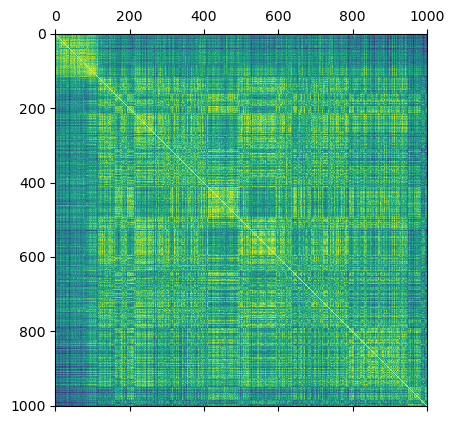

In [7]:
import numpy as np 
import pandas as pd
from scipy.spatial.distance import rogerstanimoto

dists = np.zeros((len(ifp_df),len(ifp_df)))

for i in range(len(ifp_df)):
    for j in range(len(ifp_df)):
        dists[i,j] = 1-rogerstanimoto(ifp_df.iloc[i], ifp_df.iloc[j])

import matplotlib.pyplot as plt
plt.matshow(dists)


[15:56:58] Molecule does not have explicit Hs. Consider calling AddHs()


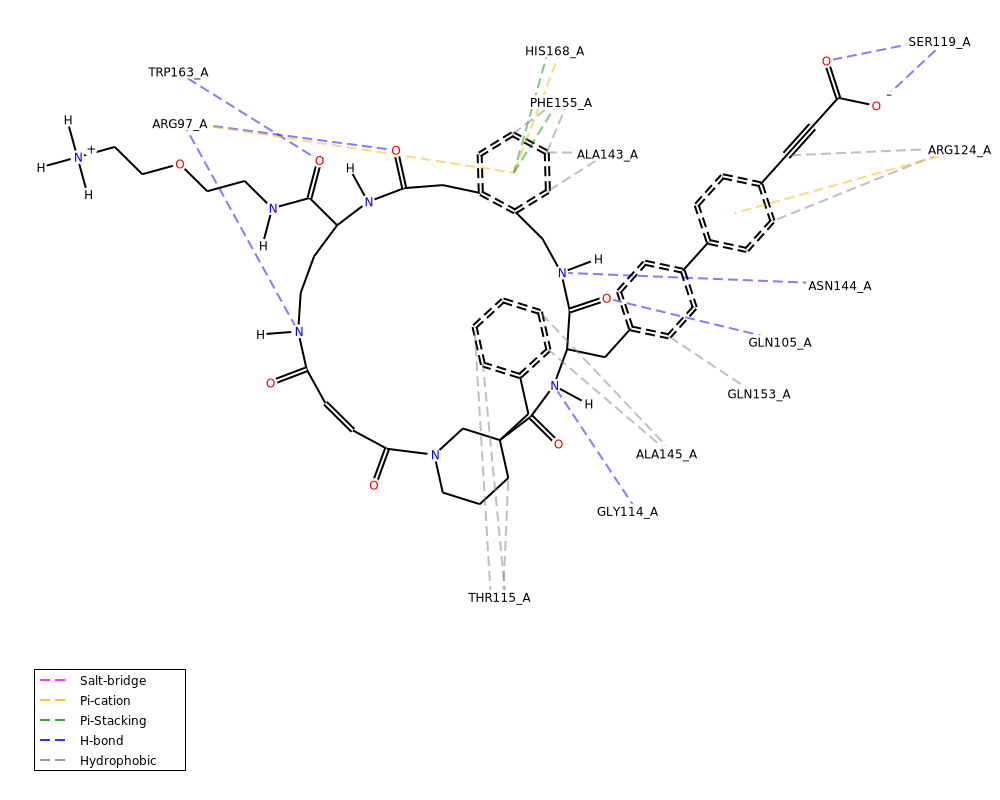

In [94]:
import numpy as np

import cairo

from rdkit import Chem
from rdkit.Chem import AllChem
from openbabel import pybel
import tempfile
import os
# from MD_PLIP.md_tools.utils import set_to_neutral_pH

self = analyser
plot_thresh=0.3
canvas_height=800
canvas_width=1000
padding=40
save_png = False
out_name=None


def set_to_neutral_pH(mol: Chem):
    """
    Not great, but does the job.
    
    * Protonates amines, but not aromatic bound amines.
    * Deprotonates carboxylic acid, phosphoric acid and sulfuric acid, without ruining esters.
    """
    protons_added = 0
    protons_removed = 0
    for indices in mol.GetSubstructMatches(Chem.MolFromSmarts('[N;D1]')):
        atom = mol.GetAtomWithIdx(indices[0])
        if atom.GetNeighbors()[0].GetIsAromatic():
            continue # aniline
        atom.SetFormalCharge(1)
        protons_added += 1
    for indices in mol.GetSubstructMatches(Chem.MolFromSmarts('C(=O)[O;D1]')):
        atom = mol.GetAtomWithIdx(indices[2])
        # benzoic acid pKa is low.
        atom.SetFormalCharge(-1)
        protons_removed += 1
    for indices in mol.GetSubstructMatches(Chem.MolFromSmarts('P(=O)[Oh1]')):
        atom = mol.GetAtomWithIdx(indices[2])
        # benzoic acid pKa is low.
        atom.SetFormalCharge(-1)
        protons_removed += 1
    for indices in mol.GetSubstructMatches(Chem.MolFromSmarts('S(=O)(=O)[Oh1]')):
        atom = mol.GetAtomWithIdx(indices[3])
        # benzoic acid pKa is low.
        atom.SetFormalCharge(-1)
        protons_removed += 1
    return (protons_added, protons_removed)

with tempfile.TemporaryDirectory() as temp_dir:
    pdb_file_path = os.path.join(temp_dir, "lig.pdb")

    self.t.atom_slice(self.topology.select("resname {}".format(self.bsid.split(":")[0])))[0].save_pdb(pdb_file_path)

    mol = [x for x in pybel.readfile("pdb",pdb_file_path)][0]
    mol.write("pdb",pdb_file_path, overwrite=True)

    mol = Chem.MolFromPDBFile(pdb_file_path,removeHs=False)
AllChem.EmbedMolecule(mol)
set_to_neutral_pH(mol)

for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 1:
        bound_atom = atom.GetBonds()[0].GetBeginAtom()
        if bound_atom.GetIdx == atom.GetIdx():
            bound_atom = atom.GetBonds()[0].GetEndAtom()

        if bound_atom.GetSymbol() in ["O","N","S"]:
            atom.SetAtomicNum(100)


mol=Chem.RemoveHs(mol)

for atom in mol.GetAtoms():
    if atom.GetAtomicNum() == 100:
        atom.SetAtomicNum(1)

Chem.rdDepictor.Compute2DCoords(mol)

atom_info = []
charge_info = []
bonds = []
for i,atom in enumerate(mol.GetAtoms()):
    coords = mol.GetConformer().GetAtomPosition(i)
    atom_info.append((coords.x, coords.y, atom.GetSymbol(), atom.GetPDBResidueInfo().GetName().strip()))

    if atom.GetFormalCharge() < 0:
        charge_info.append((coords.x+0.5, coords.y-0.3, "–", "Charge"))
    if atom.GetFormalCharge() > 0:
        charge_info.append((coords.x+0.5, coords.y-0.3, "+", "Charge"))
        
    startatoms = [bond.GetBeginAtomIdx() for bond in atom.GetBonds()]
    endatoms = [bond.GetEndAtomIdx() for bond in atom.GetBonds()]
    bond_type = [str(bond.GetBondType()).split(".")[-1] for bond in atom.GetBonds()]

    for a,b,c in zip(startatoms,endatoms,bond_type):
        if (a,b,c) not in bonds and (b,a,c) not in bonds:
            bonds.append((a,b,c))

coord_dict = {}
for entry in atom_info:
    coord_dict[entry[3]] = (entry[0],entry[1])

interactions = []
centroids = []
centroid_counter = 0

for i,row in self.hydrophobic.hydrophobic_df.drop_duplicates(subset=["LIGCARBONIDX","RESTYPE","RESNR","RESCHAIN"]).iterrows():
    if row["fpresent"] < plot_thresh:
        continue
    int_atom = str(self.topology.atom(row["LIGCARBONIDX"]-1)).split("-")[-1]
    interactions.append((int_atom, row["RESTYPE"]+str(row["RESNR"])+"_"+row["RESCHAIN"], "HPI"))#, presence_df[int_name]))

for i,row in self.hbond.hbond_df.iterrows():
    if row["fpresent"] < plot_thresh:
        continue
    if row["protisdon"]:
        int_atom = str(self.topology.atom(row["a_orig_idx"]-1)).split("-")[-1]
    else:
        int_atom = str(self.topology.atom(row["d_orig_idx"]-1)).split("-")[-1]
    if (int_atom, row["restype"]+str(row["resnr"])+"_"+row["reschain"],"HB") not in interactions:
        interactions.append((int_atom, row["restype"]+str(row["resnr"])+"_"+row["reschain"],"HB"))

for df, int_type in zip([self.pi_stacking.pi_stacking_df,self.pi_cation.pi_cation_df,self.saltbridge.saltbridge_df],
                                ["PS","PC","SB"]):
    for i,row in df.drop_duplicates(subset=["LIG_IDX_LIST","RESTYPE","RESNR","RESCHAIN"]).iterrows():
        if row["fpresent"] < plot_thresh:
            continue
        com = np.stack([coord_dict[str(self.topology.atom(x-1)).split("-")[-1]] for x in np.array(row["LIG_IDX_LIST"].split(","), dtype=int)]).mean(axis=0)
        if (com[0],com[1],"centroid","centroid_{}".format(i)) not in centroids:
            centroids.append((com[0],com[1],"centroid","centroid_{}".format(centroid_counter)))
            coord_dict["centroid_{}".format(centroid_counter)] = (com[0],com[1])
            centroid_counter += 1
            interactions.append(("centroid_{}".format(centroid_counter-1), row["RESTYPE"]+str(row["RESNR"])+"_"+row["RESCHAIN"],int_type))
        else:
            centroid_index = centroids.index((com[0],com[1],"centroid","centroid_{}".format(i)))
            interactions.append(("centroid_{}".format(centroid_index), row["RESTYPE"]+str(row["RESNR"])+"_"+row["RESCHAIN"],int_type))

used_res = np.unique(np.array([x[1] for x in interactions]))

max_x = max([coord_dict[x][0] for x in coord_dict.keys()])
min_x = min([coord_dict[x][0] for x in coord_dict.keys()])
max_y = max([coord_dict[x][1] for x in coord_dict.keys()])
min_y = min([coord_dict[x][1] for x in coord_dict.keys()])
x_center = np.mean([coord_dict[x][0] for x in coord_dict.keys()])
y_center = np.mean([coord_dict[x][1] for x in coord_dict.keys()])

res_info = []
for res in used_res:
    res_ints = [x[0] for x in interactions if x[1] == res]
    com = np.array([coord_dict[x] for x in res_ints]).mean(axis=0)-np.array([x_center, y_center])
    _com = com
    min_dist = np.min(np.sqrt(((np.array([np.array(coord_dict[key]) for key in coord_dict.keys()])-com)**2).sum(axis=1)))
    while min_dist < 3.5:
        com = com + (0.05*_com)
        min_dist = np.min(np.sqrt(((np.array([np.array(coord_dict[key]) for key in coord_dict.keys()])-com)**2).sum(axis=1)))
    res_info.append((com[0],com[1],"residue",res))

    
# Sort the label coordinates by y-value
res_info = sorted(res_info, key=lambda x: x[1])

# Ensure minimum spacing of 2.5 units between labels
min_spacing = 2.0

for i in range(len(res_info)):
    current_x, current_y, label_type, label_name = res_info[i]
    
    # Check spacing between current label and the previous ones
    for j in range(len(res_info)):
        prev_x, prev_y, prev_type, prev_label = res_info[j]
        if abs(current_y - prev_y) < min_spacing and abs(current_x - prev_x) < 5 and j != i:
            if current_y > prev_y:
                current_y = prev_y + min_spacing
                res_info[i] = (current_x, current_y, label_type, label_name)
            else:
                prev_y = current_y+min_spacing
                res_info[j] = (prev_x, prev_y, prev_type, prev_label)

    # Update the y-value
    res_info[i] = (current_x, current_y, label_type, label_name)

atom_info = atom_info + centroids
lines = []
for i in range(len(res_info)):
    res = res_info[i][3]
    for j in range(len(interactions)):
        if interactions[j][1] == res:
            atom = interactions[j][0]
            atom_index = [x[3] for x in atom_info].index(atom)
            lines.append((i+len(atom_info), atom_index, interactions[j][2]))

atom_info = atom_info + res_info + charge_info

connections = bonds + lines

# Define padding
padding = 40

color_dict = {"O":(1, 0, 0),
                "N":(0,0,1.0),
                "S":(0.9,0.775,0.25),
                "P":(1.0,0.5,0),
                "B":(1.0,0.71,0.71)}

# Set canvas size including padding
# canvas_width, canvas_height = canvas_height + 2 * padding, 800 + 2 * padding
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, canvas_width, canvas_height)
ctx = cairo.Context(surface)

# Set background color
ctx.set_source_rgb(1, 1, 1)
ctx.paint()

# Set line width
ctx.set_line_width(4)

# Draw a simple graph with labels and bond types
data_points = atom_info
# connections = bonds  # Format: (start_index, end_index, bond_type)

# Calculate scaling factors to fit within the canvas
min_x, min_y = min(point[0] for point in data_points), min(point[1] for point in data_points)
max_x, max_y = max(point[0] for point in data_points), max(point[1] for point in data_points)

x_scale = y_scale = min((canvas_width - 2 * padding) / (max_x - min_x), (canvas_height - 2 * padding) / (max_y - min_y))

# Draw connections with different line styles based on bond type
for start, end, bond_type in connections:
    start_x, start_y, _, _ = data_points[start]
    end_x, end_y, _, _ = data_points[end]
    jitter = np.random.uniform(-10,10)

    # Apply scaling and padding to coordinates
    start_x = (start_x - min_x) * x_scale + padding
    start_y = (start_y - min_y) * y_scale + padding
    end_x = (end_x - min_x) * x_scale + padding
    end_y = (end_y - min_y) * y_scale + padding

    # Set line style based on bond type
    if bond_type == "SINGLE":
        ctx.set_source_rgb(0, 0, 0)  # Black color
        ctx.set_line_width(2)  # Adjust line width for double bond
        ctx.move_to(start_x, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_line_width(0)

    elif bond_type == "DOUBLE":
        ctx.set_source_rgb(0,0,0)  # White color
        ctx.set_line_width(6)  # Adjust line width for double bond
        ctx.move_to(start_x, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_source_rgb(1,1,1)  # Black color
        ctx.set_line_width(2)  # Reset line width
        ctx.move_to(start_x, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_line_width(0)

    elif bond_type == "AROMATIC":
        ctx.set_source_rgb(0,0,0)  # White color
        ctx.set_line_width(6)  # Adjust line width for aromatic bond
        ctx.set_dash([10, 5], 0)  # Set dash pattern for aromatic bond
        ctx.move_to(start_x, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_source_rgb(1,1,1)  # Black color
        ctx.set_dash([], 0)  # Reset dash pattern
        ctx.set_line_width(2)  # Reset line width
        ctx.move_to(start_x, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_line_width(0)

    elif bond_type == "TRIPLE":
        ctx.set_source_rgb(0,0,0)  # White color
        ctx.set_line_width(10)  # Adjust line width for double bond
        ctx.move_to(start_x, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_source_rgb(1,1,1)  # Black color
        ctx.set_line_width(6)  # Reset line width
        ctx.move_to(start_x, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_source_rgb(0,0,0)  # Black color
        ctx.set_line_width(2)  # Reset line width
        ctx.move_to(start_x, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_line_width(0)
    
    elif bond_type == "HPI":
        ctx.set_source_rgba(0.5,0.5,0.5, 0.5)  # Grey color
        ctx.set_line_width(2) 
        ctx.set_dash([10, 5], 0)  # Set dash pattern for aromatic bond
        ctx.move_to(start_x+jitter, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_line_width(0)
    elif bond_type == "HB":
        ctx.set_source_rgba(0, 0, 1, 0.5)  # Blue color
        ctx.set_line_width(2) 
        ctx.set_dash([10, 5], 0)  # Set dash pattern for aromatic bond
        ctx.move_to(start_x+jitter, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_line_width(0)
    elif bond_type == "PS":
        ctx.set_source_rgba(0, 0.6, 0, 0.5)  # Black color
        ctx.set_line_width(2) 
        ctx.set_dash([10, 5], 0)  # Set dash pattern for aromatic bond
        ctx.move_to(start_x+jitter, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_line_width(0)
    elif bond_type == "PC":
        ctx.set_source_rgba(1, 0.7, 0, 0.5)  # Black color
        ctx.set_line_width(2) 
        ctx.set_dash([10, 5], 0)  # Set dash pattern for aromatic bond
        ctx.move_to(start_x+jitter, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_line_width(0)
    elif bond_type == "SB":
        ctx.set_source_rgba(1, 0, 1, 0.5)  # Black color
        ctx.set_line_width(2) 
        ctx.set_dash([10, 5], 0)  # Set dash pattern for aromatic bond
        ctx.move_to(start_x+jitter, start_y)
        ctx.line_to(end_x, end_y)
        ctx.stroke()
        ctx.set_line_width(0)



# Draw filled circles and labels with padding
for x, y, label, res in data_points:
    if label in ["C", "centroid"]:
        continue

    # Draw a filled white circle at each data point
    ctx.set_source_rgb(1, 1, 1)  # White color
    ctx.arc((x - min_x) * x_scale + padding, (y - min_y) * y_scale + padding, 7, 0, 2 * 3.14)
    ctx.fill_preserve()  # Preserve the path for stroking
    ctx.stroke()
        
    # Set text alignment to center
    ctx.select_font_face("Sans", cairo.FONT_SLANT_NORMAL, cairo.FONT_WEIGHT_NORMAL)
    ctx.set_font_size(12)

    # Calculate text width and height
    text_extents = ctx.text_extents(res if label == "residue" else label)
    text_width = text_extents[2]
    text_height = text_extents[3]

    # Position text at the center of the point with padding
    text_x = (x - min_x) * x_scale + padding - text_width / 2
    text_y = (y - min_y) * y_scale + padding + text_height / 2
    ctx.move_to(text_x, text_y)

    if label == "residue":
        # Draw a white rectangle behind the text for label "residue"
        ctx.rectangle(text_x - 2, text_y - text_height, text_width + 4, text_height + 2)
        ctx.set_source_rgba(1,1,1,1)  # White color
        ctx.fill()
    
    if label in ["O","N","S","P","B"]:
        color = color_dict[label]
        ctx.set_source_rgba(color[0],color[1],color[2],1)

    else:
        ctx.set_source_rgba(0, 0, 0, 1)
    ctx.move_to(text_x, text_y)
    ctx.text_path(res if label == "residue" else label)
    ctx.fill()

legend_x, legend_y = padding, canvas_height - padding

# Define legend items
legend_items = [
    ("Hydrophobic", (0.5,0.5,0.5)),
    ("H-bond", (0, 0, 1)),
    ("Pi-Stacking", (0,0.6,0)),
    ("Pi-cation", (1,0.7,0)),
    ("Salt-bridge", (1,0,1)),
]

# Calculate legend size
legend_width = 150
legend_height = len(legend_items) * 20

# Draw legend rectangle
ctx.set_source_rgb(0,0,0)  # Black color
ctx.set_line_width(2)
ctx.set_dash([], 0)  # Set dash pattern for aromatic bond

ctx.rectangle(legend_x-5, legend_y - legend_height + 10, legend_width, legend_height)
ctx.stroke_preserve()
ctx.set_source_rgb(1,1,1)
ctx.fill()

# Draw legend items
for label, color in legend_items:
    ctx.set_line_width(2)
    ctx.set_source_rgba(color[0], color[1], color[2],0.8)  # Black color
    ctx.set_dash([10, 5], 0)  # Set dash pattern for aromatic bond


    # Draw legend line
    ctx.move_to(legend_x, legend_y)
    ctx.line_to(legend_x + 30, legend_y)
    ctx.stroke()

    # Draw legend label
    ctx.set_source_rgb(0, 0, 0)
    ctx.move_to(legend_x + 40, legend_y + 5)
    ctx.show_text(label)

    # Move down for the next legend item
    legend_y -= 20

# Save the image to a file
if save_png:
    surface.write_to_png(out_name)

try:
    from IPython.display import display, Image
    import io
    image_stream = io.BytesIO()
    surface.write_to_png(image_stream)
    display(Image(data=image_stream.getvalue(), format="png"))
except:
    None

In [89]:
connections

[(0, 1, 'SINGLE'),
 (0, 71, 'SINGLE'),
 (0, 44, 'SINGLE'),
 (1, 21, 'SINGLE'),
 (1, 26, 'SINGLE'),
 (2, 26, 'SINGLE'),
 (2, 23, 'SINGLE'),
 (3, 23, 'SINGLE'),
 (3, 4, 'SINGLE'),
 (3, 51, 'DOUBLE'),
 (4, 5, 'DOUBLE'),
 (5, 6, 'SINGLE'),
 (6, 50, 'DOUBLE'),
 (6, 24, 'SINGLE'),
 (7, 24, 'SINGLE'),
 (7, 8, 'SINGLE'),
 (8, 19, 'SINGLE'),
 (8, 9, 'SINGLE'),
 (8, 12, 'SINGLE'),
 (9, 10, 'SINGLE'),
 (10, 11, 'SINGLE'),
 (11, 24, 'SINGLE'),
 (12, 13, 'SINGLE'),
 (13, 18, 'AROMATIC'),
 (13, 14, 'AROMATIC'),
 (14, 15, 'AROMATIC'),
 (15, 16, 'AROMATIC'),
 (16, 17, 'AROMATIC'),
 (17, 18, 'AROMATIC'),
 (19, 49, 'DOUBLE'),
 (19, 25, 'SINGLE'),
 (20, 43, 'SINGLE'),
 (20, 25, 'SINGLE'),
 (20, 27, 'SINGLE'),
 (21, 64, 'SINGLE'),
 (21, 22, 'DOUBLE'),
 (23, 72, 'SINGLE'),
 (25, 73, 'SINGLE'),
 (27, 28, 'SINGLE'),
 (28, 42, 'AROMATIC'),
 (28, 29, 'AROMATIC'),
 (29, 30, 'AROMATIC'),
 (30, 31, 'AROMATIC'),
 (31, 41, 'AROMATIC'),
 (31, 32, 'SINGLE'),
 (32, 40, 'AROMATIC'),
 (32, 33, 'AROMATIC'),
 (33, 34, 'AR

In [73]:
interactions = []
centroid_counter = 0 
centroids = []

for df, int_type in zip([self.pi_stacking.pi_stacking_df,self.pi_cation.pi_cation_df,self.saltbridge.saltbridge_df],
                                ["PS","PC","SB"]):
    for i,row in df.drop_duplicates(subset=["LIG_IDX_LIST","RESTYPE","RESNR","RESCHAIN"]).iterrows():
        if row["fpresent"] < plot_thresh:
            continue
        com = np.stack([coord_dict[str(self.topology.atom(x-1)).split("-")[-1]] for x in np.array(row["LIG_IDX_LIST"].split(","), dtype=int)]).mean(axis=0)
        if (com[0],com[1],"centroid","centroid_{}".format(i)) not in centroids:
            centroids.append((com[0],com[1],"centroid","centroid_{}".format(centroid_counter)))
            coord_dict["centroid_{}".format(centroid_counter)] = (com[0],com[1])
            centroid_counter += 1
            interactions.append(("centroid_{}".format(centroid_counter-1), row["RESTYPE"]+str(row["RESNR"])+"_"+row["RESCHAIN"],int_type))
        else:
            centroid_index = centroids.index((com[0],com[1],"centroid","centroid_{}".format(i)))
            if (f'centroid_{centroid_index}',row["RESTYPE"]+str(row["RESNR"])+"_"+row["RESCHAIN"], "PS") in interactions or ('centroid_{}',row["RESTYPE"]+str(row["RESNR"])+"_"+row["RESCHAIN"], "PC") in interactions or ('centroid_{}',row["RESTYPE"]+str(row["RESNR"])+"_"+row["RESCHAIN"], "SB") in interactions:
                centroids.append((com[0],com[1]+0.5,"centroid","centroid_{}".format(centroid_counter)))
                coord_dict["centroid_{}".format(centroid_counter)] = (com[0],com[1]+0.5)
                centroid_counter += 1
                interactions.append(("centroid_{}".format(centroid_counter-1), row["RESTYPE"]+str(row["RESNR"])+"_"+row["RESCHAIN"],int_type))
            else:
                interactions.append(("centroid_{}".format(centroid_index), row["RESTYPE"]+str(row["RESNR"])+"_"+row["RESCHAIN"],int_type))


In [74]:
interactions

[('centroid_0', 'PHE155_A', 'PS'),
 ('centroid_1', 'HIS168_A', 'PS'),
 ('centroid_0', 'ARG97_A', 'PC'),
 ('centroid_2', 'HIS168_A', 'PC'),
 ('centroid_3', 'ARG124_A', 'PC')]

In [61]:
centroid_index

2

In [56]:
('centroid_0', 'ARG97_A') in interactions

False

In [58]:
np.array(interactions)[:,:2]

array([['CCG', 'PHE155_A'],
       ['CCF', 'PHE155_A'],
       ['CCF', 'ALA143_A'],
       ['CAN', 'THR115_A'],
       ['CCE', 'ALA143_A'],
       ['CAW', 'ALA145_A'],
       ['CAS', 'THR115_A'],
       ['CAV', 'ALA145_A'],
       ['CAT', 'THR115_A'],
       ['CBR', 'GLN153_A'],
       ['CBO', 'ARG124_A'],
       ['CBJ', 'ARG124_A'],
       ['N04', 'ASN144_A'],
       ['OBN', 'SER119_A'],
       ['OBT', 'GLN105_A'],
       ['N03', 'GLY114_A'],
       ['OBM', 'SER119_A'],
       ['OCI', 'ARG97_A'],
       ['N01', 'ARG97_A'],
       ['O', 'TRP163_A'],
       ['centroid_0', 'PHE155_A'],
       ['centroid_1', 'HIS168_A'],
       ['centroid_0', 'ARG97_A'],
       ['centroid_1', 'HIS168_A'],
       ['centroid_2', 'ARG124_A']], dtype='<U10')

In [55]:
interactions

[('CCG', 'PHE155_A', 'HPI'),
 ('CCF', 'PHE155_A', 'HPI'),
 ('CCF', 'ALA143_A', 'HPI'),
 ('CAN', 'THR115_A', 'HPI'),
 ('CCE', 'ALA143_A', 'HPI'),
 ('CAW', 'ALA145_A', 'HPI'),
 ('CAS', 'THR115_A', 'HPI'),
 ('CAV', 'ALA145_A', 'HPI'),
 ('CAT', 'THR115_A', 'HPI'),
 ('CBR', 'GLN153_A', 'HPI'),
 ('CBO', 'ARG124_A', 'HPI'),
 ('CBJ', 'ARG124_A', 'HPI'),
 ('N04', 'ASN144_A', 'HB'),
 ('OBN', 'SER119_A', 'HB'),
 ('OBT', 'GLN105_A', 'HB'),
 ('N03', 'GLY114_A', 'HB'),
 ('OBM', 'SER119_A', 'HB'),
 ('OCI', 'ARG97_A', 'HB'),
 ('N01', 'ARG97_A', 'HB'),
 ('O', 'TRP163_A', 'HB'),
 ('centroid_0', 'PHE155_A', 'PS'),
 ('centroid_1', 'HIS168_A', 'PS'),
 ('centroid_0', 'ARG97_A', 'PC'),
 ('centroid_1', 'HIS168_A', 'PC'),
 ('centroid_2', 'ARG124_A', 'PC')]

In [47]:
def set_to_neutral_pH(mol: Chem):
    """
    Not great, but does the job.
    
    * Protonates amines, but not aromatic bound amines.
    * Deprotonates carboxylic acid, phosphoric acid and sulfuric acid, without ruining esters.
    """
    protons_added = 0
    protons_removed = 0
    for indices in mol.GetSubstructMatches(Chem.MolFromSmarts('[N;D1]')):
        atom = mol.GetAtomWithIdx(indices[0])
        if atom.GetNeighbors()[0].GetIsAromatic():
            continue # aniline
        atom.SetFormalCharge(1)
        protons_added += 1
    for indices in mol.GetSubstructMatches(Chem.MolFromSmarts('C(=O)[O;D1]')):
        atom = mol.GetAtomWithIdx(indices[2])
        # benzoic acid pKa is low.
        atom.SetFormalCharge(-1)
        protons_removed += 1
    for indices in mol.GetSubstructMatches(Chem.MolFromSmarts('P(=O)[Oh1]')):
        atom = mol.GetAtomWithIdx(indices[2])
        # benzoic acid pKa is low.
        atom.SetFormalCharge(-1)
        protons_removed += 1
    for indices in mol.GetSubstructMatches(Chem.MolFromSmarts('S(=O)(=O)[Oh1]')):
        atom = mol.GetAtomWithIdx(indices[3])
        # benzoic acid pKa is low.
        atom.SetFormalCharge(-1)
        protons_removed += 1
    return (protons_added, protons_removed)


(0, 1)

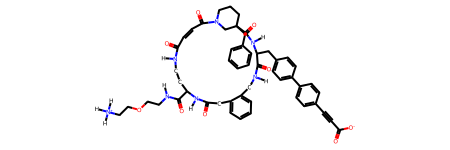

In [48]:
mol

In [24]:
for atom in mol.GetAtoms():
    print(atom.GetFormalCharge())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0


In [22]:
dir(atom)

['ClearProp',
 'DescribeQuery',
 'GetAtomMapNum',
 'GetAtomicNum',
 'GetBonds',
 'GetBoolProp',
 'GetChiralTag',
 'GetDegree',
 'GetDoubleProp',
 'GetExplicitBitVectProp',
 'GetExplicitValence',
 'GetFormalCharge',
 'GetHybridization',
 'GetIdx',
 'GetImplicitValence',
 'GetIntProp',
 'GetIsAromatic',
 'GetIsotope',
 'GetMass',
 'GetMonomerInfo',
 'GetNeighbors',
 'GetNoImplicit',
 'GetNumExplicitHs',
 'GetNumImplicitHs',
 'GetNumRadicalElectrons',
 'GetOwningMol',
 'GetPDBResidueInfo',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetQueryType',
 'GetSmarts',
 'GetSymbol',
 'GetTotalDegree',
 'GetTotalNumHs',
 'GetTotalValence',
 'GetUnsignedProp',
 'HasOwningMol',
 'HasProp',
 'HasQuery',
 'InvertChirality',
 'IsInRing',
 'IsInRingSize',
 'Match',
 'NeedsUpdatePropertyCache',
 'SetAtomMapNum',
 'SetAtomicNum',
 'SetBoolProp',
 'SetChiralTag',
 'SetDoubleProp',
 'SetExplicitBitVectProp',
 'SetFormalCharge',
 'SetHybridization',
 'SetIntProp',
 'SetIsAromatic',
 'SetIsotope',
 'Set